In [54]:
import skimage as ski
import scipy
from skimage import morphology 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]



In [218]:
def rescale_image (image, proportion):
    return ski.img_as_ubyte(scipy.misc.imresize(image, proportion, interp ="bicubic"))

def rotate_image(image, degrees):
    return ski.img_as_ubyte(ski.transform.rotate(image, degrees, resize=True, mode='edge'))

def load_image(filename):
    return ski.img_as_ubyte(ski.io.imread(filename))

def chroma_key (background, image, initial_pos_Y, initial_pos_X):
    image =  ski.color.rgb2hsv(image[:,:,:3])
    background =  ski.color.rgb2hsv(background[:,:,:3])
    for i,row in enumerate(image):
        for j,pixel in enumerate(row):
            if not(0.25 < pixel [0] < 0.42 and pixel[2] > 0.2 and pixel[1] > 0.2):
                background[i+initial_pos_Y,j+initial_pos_X,:3] = pixel[:3]
    return ski.color.hsv2rgb(background)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


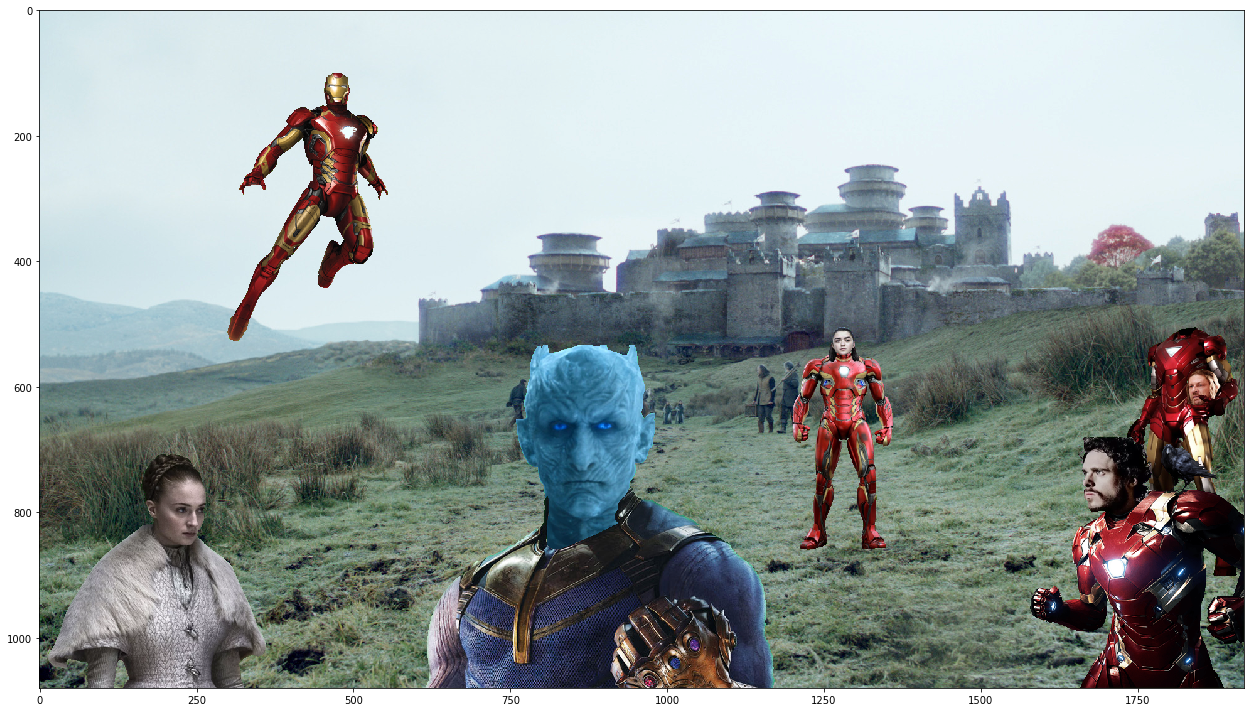

In [235]:
background = load_image("Images/back_ground.jpg")

iron_man = load_image ("Images/ironman.tif")
stark_symbol =  load_image ("Images/stark_symbol.tif")
stark_symbol = rescale_image(stark_symbol, 0.23)
#ski.io.imshow(stark_symbol)
iron_man = chroma_key (iron_man, stark_symbol, 580, 1240) 
#ski.io.imshow(iron_man)


iron_man = rescale_image(iron_man, 1/7)
background = chroma_key (background, iron_man, 100, 300)

arya_stark_head = load_image ("Images/arya_head.tif")
arya_stark_head = rescale_image(arya_stark_head, 0.85)
iron_man_armor = load_image("Images/ironman armor.tif")
arya = chroma_key(iron_man_armor, arya_stark_head, 10, 130)
arya = rescale_image(arya, 0.27)
background = chroma_key (background, arya, 500, 1200)

sansa = load_image ("Images/sansa_stark.tif")
sansa = rescale_image(sansa, 0.45)
#print(sansa.shape)

background = chroma_key(background, sansa, 684, 0)


green_background = np.zeros((1311 ,894 ,3))
green_background[:,:,1] = 1
ned_head = load_image("Images/ned_head.tif")
ned_head = ned_head[:, ::-1]
ned_head = rescale_image (ned_head, 0.43)
green_background = chroma_key(green_background, ned_head,350, 260) 
#ski.io.imshow(green_background)
ned_armor = load_image("Images/ironman holding helmet.tif")
#print (ned_armor.shape)
ned_armor = chroma_key(green_background, ned_armor, 0, 0) 
ned_armor = ned_armor[:, ::-1]
ned_armor = rescale_image(ned_armor, 0.35)
#print (ned_armor.shape)
background = chroma_key(background, ned_armor, 450, 1670) 



robb_head = load_image ("Images/robb_head.tif")
robb_head = robb_head[:, ::-1]
robb_head = rescale_image(robb_head, 0.75)
robb_armor = load_image("Images/tony_stark.tif")
robb_armor = robb_armor[:, ::-1]
robb_armor = chroma_key(robb_armor, robb_head, 10 , 290)
robb_armor = rescale_image(robb_armor, 0.6)
background = chroma_key(background, robb_armor,674, 1470)




bran_raven = load_image("Images/raven.tif")
bran_raven = rescale_image(bran_raven, 0.20)
background = chroma_key(background ,bran_raven ,690 ,1785)



green_background = np.zeros((551,594,3))
green_background[:,:,1] = 1
nk_head = load_image("Images/nk_head.tif")
nk_head = rescale_image(nk_head, 0.45)
nk_head = chroma_key(green_background, nk_head, 0, 134)
nk_thanos = chroma_key(nk_head, thanos, 200, 0)
thanos = load_image("Images/thanos.tif")
nk_thanos = chroma_key(nk_head, thanos, 200, 0)
background = chroma_key(background, nk_thanos, 529, 600)






#equalizing ironman crop on background
#mask = np.zeros(( 1080, 1920))
#mask[300:300+iron_man.shape[0],500:500+iron_man.shape[1]] = 1
#background = ski.exposure.equalize_hist(background, nbins=256, mask = mask)
#ski.io.imshow(background)
#background = ski.exposure.equalize_hist(background, nbins=256)
ski.io.imshow(background)
ski.io.imsave("teste.png",background)

